<a href="https://colab.research.google.com/github/Pakryeongmi/python_bigdata/blob/main/%EB%B9%84%ED%8A%B82205_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%94%A5%EB%9F%AC%EB%8B%9D_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 선형 회귀

KNN을 활용하기 꺼려지는 상황



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/data/Fish.csv'
df = pd.read_csv(path)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
perch_df = df[df['Species'] == 'Perch']
perch_df

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
79,Perch,80.0,17.2,19.0,20.2,5.6358,3.0502
80,Perch,85.0,17.8,19.6,20.8,5.1376,3.0368
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720


In [ ]:
perch_length = perch_df['Length2'].to_numpy()
perch_weight = perch_df['Weight'].to_numpy()
print(perch_length)
print(perch_weight)

[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


#### 길이를 알고 있을 때 무게를 예측해 보자.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

In [ ]:
train_input.shape

(42,)

In [ ]:
train_input = train_input.reshape(-1, 1) #독립 변수 목록은 2차원 배열 구조로 변경
test_input = test_input.reshape(-1, 1)
train_input.shape

(42, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
kn = KNeighborsRegressor(n_neighbors=3) #모델 생성
kn.fit(train_input, train_target) #공부
pval = kn.predict([[50]]) #예측
print('예측값:', pval)

예측값: [1033.33333333]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(kn.kneighbors([[50]]))

(array([[6. , 6.5, 7. ]]), array([[19, 10,  3]]))


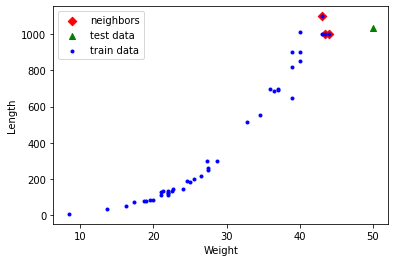

In [ ]:
distances, indexes = kn.kneighbors([[50]])
plt.scatter(train_input[indexes], train_target[indexes], label='neighbors', marker='D', color='r')
plt.scatter(50, 1033, label='test data', marker='^', color='g')
plt.scatter(train_input, train_target, label='train data', color='b', marker='.')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.legend()
plt.show()

In [ ]:
pval = kn.predict([[100]])
print(pval)

[1033.33333333]


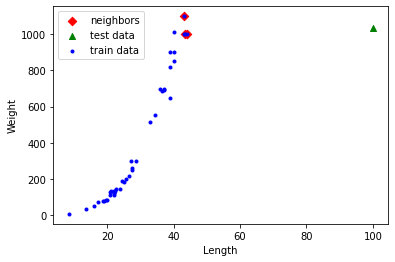

In [ ]:
distances, indexes = kn.kneighbors([[50]])
plt.scatter(train_input[indexes], train_target[indexes], label='neighbors', marker='D', color='r')
plt.scatter(100, 1033, label='test data', marker='^', color='g')
plt.scatter(train_input, train_target, label='train data', color='b', marker='.')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression() #모델 생성
lr.fit(train_input, train_target) #공부
p_val = lr.predict([[50], [100]]) #예측
print(p_val)

[1185.14096223 3002.10195253]


In [ ]:
p_val2 = kn.predict([[50], [100]])
print(p_val2)

[1033.33333333 1033.33333333]


In [ ]:
print('가중치(기울기):', lr.coef_, '편향:', lr.intercept_)

가중치(기울기): [36.33921981] 편향: -631.8200280744676


In [ ]:
print(50*lr.coef_ + lr.intercept_)
print(p_val[0])

[1185.14096223]
1185.1409622290876


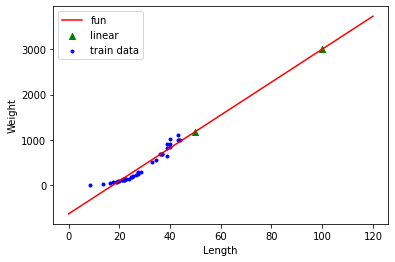

In [ ]:
plt.scatter([50, 100],p_val, label='linear', marker='^', color='g')
plt.scatter(train_input, train_target, label='train data', color='b', marker='.')
plt.plot([0, 120], [0*lr.coef_ + lr.intercept_, 120*lr.coef_ + lr.intercept_], label='fun', color='r')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

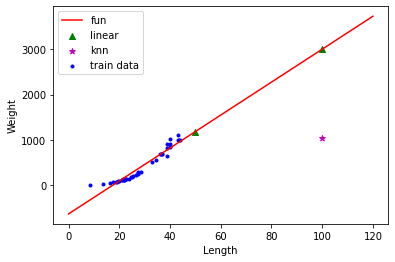

In [ ]:
plt.scatter([50, 100], p_val, label='linear', marker='^', color='g')
plt.scatter([100], pval, label='knn', marker='*', color='m')
plt.scatter(train_input, train_target, label='train data', color='b', marker='.')
plt.plot([0, 120], [0*lr.coef_ + lr.intercept_, 120*lr.coef_ + lr.intercept_], label='fun', color='r')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

#### 가상의 데이터를 만들어서 션형 회귀를 해보자.
y = 2x+3에 가까운 데이터

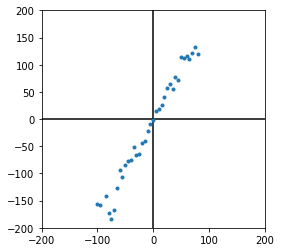

In [ ]:
plt.figure(figsize=(4,4))
input = [x for x in range(-100, 100, 5)]
target = [(2 + np.random.uniform(-0.5, 0.5)) * x + np.random.randint(-3, 3) for x in input]
plt.plot(input[:], target, '.')
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.vlines(0, -200, 200)
plt.hlines(0, -200, 200)
plt.show()

In [ ]:
input_data = np.array(input).reshape(-1, 1)

In [ ]:
input_data.shape

(40, 1)

In [ ]:
target_data = np.array(target)

In [ ]:
lr = LinearRegression()
lr.fit(input_data, target_data)
print(f'편향:{lr.coef_[0]:.2f} 기울기:{lr.intercept_:.2f}')

편향:1.98 기울기:0.87


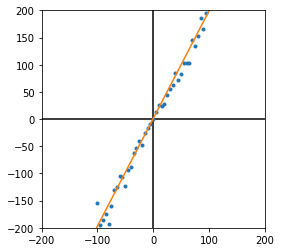

In [ ]:
plt.figure(figsize=(4,4))
input = [x for x in range(-100, 100, 5)]
target = [(2 + np.random.uniform(-0.5, 0.5)) * x + np.random.randint(-3, 3) for x in input]
plt.plot(input[:], target, '.')
plt.plot([-200, 200], [-200*lr.coef_ + lr.intercept_, 200*lr.coef_ + lr.intercept_])
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.vlines(0, -200, 200)
plt.hlines(0, -200, 200)
plt.show()

y=2xx+3x+5

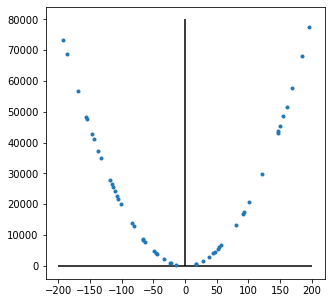

In [ ]:
plt.figure(figsize=(5,5))
input = [np.random.randint(-200, 200) for _ in range(50)]
target = [2*x*x+3*x+5 + np.random.randint(-10, 10) for x in input]
plt.plot(input, target, '.')
#plt.xlim(-200, 200)
#plt.ylim(-200, 200)
plt.vlines(0, -200, 80000)
plt.hlines(0, -200, 200)
plt.show()

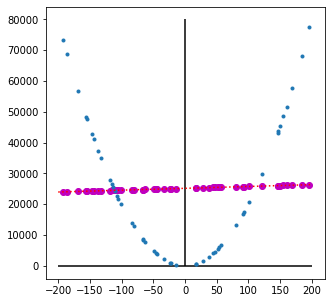

In [ ]:
input_arr = np.array(input).reshape(-1, 1)
lr = LinearRegression()
lr.fit(input_arr, target)
p_val = lr.predict(input_arr)
plt.figure(figsize=(5,5))
plt.scatter(input, p_val, color='m')
plt.plot(input, target, '.')
plt.plot([-200, 200], [-200*lr.coef_ + lr.intercept_, 200*lr.coef_ + lr.intercept_], 'r:')
plt.vlines(0, -200, 80000)
plt.hlines(0, -200, 200)
plt.show()

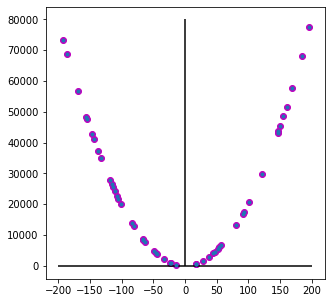

In [ ]:
input_total = [[x, x*x] for x in input]
lr = LinearRegression()
lr.fit(input_total, target)
p_val2 = lr.predict(input_total)
plt.figure(figsize=(5,5))
plt.plot(input, target, '.')
plt.scatter(input, p_val2, color='m')
plt.vlines(0, -200, 80000)
plt.hlines(0, -200, 200)
plt.show()

In [ ]:
print(type(train_input))

<class 'numpy.ndarray'>


In [ ]:
print(train_input.shape)

(42, 1)


In [ ]:
lr = LinearRegression()
lr.fit(train_input, train_target)
p_val = lr.predict([[2], [10], [50], [100]])
print('예측:', p_val)

예측: [-559.14158846 -268.42783001 1185.14096223 3002.10195253]


In [ ]:
perch_length = perch_df['Length2'].to_numpy()
perch_weight = perch_df['Weight'].to_numpy()
pl2 = [[x, x*x] for x in perch_length]
lr = LinearRegression()
lr.fit(pl2, perch_weight)

LinearRegression()

In [ ]:
test2 = [[x, x*x] for x in range(0, 100)]
p_val2 = lr.predict(test2)

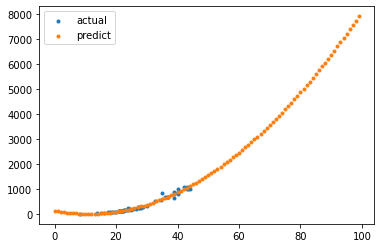

In [ ]:
plt.scatter(perch_length, perch_weight, label='actual', marker='.')
plt.scatter(range(0, 100), p_val2, label='predict', marker='.')
plt.legend()
plt.show()

weight = -22.41*length + 1.02length*length + 131.6453

In [ ]:
print(lr.coef_, lr.intercept_)

[-22.4189282    1.02094922] 131.6453196989612


In [ ]:
perch_df

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
79,Perch,80.0,17.2,19.0,20.2,5.6358,3.0502
80,Perch,85.0,17.8,19.6,20.8,5.1376,3.0368
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720


In [ ]:
perch_full = perch_df[['Length2', 'Height', 'Width']].to_numpy()
print(perch_full)

[[ 8.4     2.112   1.408 ]
 [13.7     3.528   1.9992]
 [15.      3.824   2.432 ]
 [16.2     4.5924  2.6316]
 [17.4     4.588   2.9415]
 [18.      5.2224  3.3216]
 [18.7     5.1992  3.1234]
 [19.      5.6358  3.0502]
 [19.6     5.1376  3.0368]
 [20.      5.082   2.772 ]
 [21.      5.6925  3.555 ]
 [21.      5.9175  3.3075]
 [21.      5.6925  3.6675]
 [21.3     6.384   3.534 ]
 [22.      6.11    3.4075]
 [22.      5.64    3.525 ]
 [22.      6.11    3.525 ]
 [22.      5.875   3.525 ]
 [22.      5.5225  3.995 ]
 [22.5     5.856   3.624 ]
 [22.5     6.792   3.624 ]
 [22.7     5.9532  3.63  ]
 [23.      5.2185  3.626 ]
 [23.5     6.275   3.725 ]
 [24.      7.293   3.723 ]
 [24.      6.375   3.825 ]
 [24.6     6.7334  4.1658]
 [25.      6.4395  3.6835]
 [25.6     6.561   4.239 ]
 [26.5     7.168   4.144 ]
 [27.3     8.323   5.1373]
 [27.5     7.1672  4.335 ]
 [27.5     7.0516  4.335 ]
 [27.5     7.2828  4.5662]
 [28.      7.8204  4.2042]
 [28.7     7.5852  4.6354]
 [30.      7.6156  4.7716]
 

In [ ]:
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()
poly.fit([[2,3]]) #x1 = 2 / x2 = 3
poly.transform([[2,3]]) #[1, x1, x2, x1^, x1*x2, x2^]

array([[1., 2., 3., 4., 6., 9.]])

In [ ]:
poly = PolynomialFeatures(degree=3)
poly.fit([[2,3]])
poly.transform([[2,3]]) 

array([[ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False) # 결과값에서 상수(1)를 빼라
poly.fit([[2,3]])
poly.transform([[2,3]]) 

array([[ 2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [ ]:
print(poly.get_feature_names())

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[1,2,3]])
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 9)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.99019409692988
0.9677129348720285


In [ ]:
poly5 = PolynomialFeatures(include_bias=False, degree=5)
poly5.fit([[1,2,3]])
train_poly5 = poly5.transform(train_input)
test_poly5 = poly5.transform(test_input)
print(train_poly5.shape)

(42, 55)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly5, train_target)
print(lr.score(train_poly5, train_target))
print(lr.score(test_poly5, test_target))

0.9999999999999998
0.10626123125065745


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit([[1,2], [1,2], [2,3], [3,4], [3,1]])
print(ss.transform([[1,2], [1,2], [2,3], [3,4], [3,1]]))

[[-1.11803399 -0.39223227]
 [-1.11803399 -0.39223227]
 [ 0.          0.58834841]
 [ 1.11803399  1.56892908]
 [ 1.11803399 -1.37281295]]


In [ ]:
a = np.array([1,1,2,3,3])
print(a.mean(), a.std())

2.0 0.8944271909999159


In [ ]:
print(a-a.mean()/a.std())

[-1.23606798 -1.23606798 -0.23606798  0.76393202  0.76393202]


In [ ]:
print(a-2.0/0.8944)

[-1.23613596 -1.23613596 -0.23613596  0.76386404  0.76386404]


In [ ]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
lr = LinearRegression()
lr.fit(train_scaled, train_target)
print(lr.coef_)

[   97.75386986  -266.15346637   -60.20976616  -594.01007153
   649.48382518   767.51790839  1784.26665681 -3624.72314073
  1605.93165919]


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.coef_)

[-27.98095987 -38.15409007 -36.17004454  84.20778765  80.92057451
  73.21400642  77.82818692  68.27215449  63.183518  ]


In [ ]:
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9855355031291678
0.9849379026821109


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.coef_)

[-41.66317902 -92.28357207  -0.         103.44060735 137.59496357
  24.48265393 124.48720394   0.          90.43783443]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.347e+02, tolerance: 5.138e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9870048279184815
0.9837553825366065


#### 하이퍼 파라미터 값을 그라디언트하게 전달하면서 적절한 값을 찾아라.

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
print(train_score, test_score)

[0.9894171210705593, 0.9886427127983067, 0.9882291216631598, 0.9855355031291678, 0.9728819491717042, 0.9247809601073136] [0.9752820909457244, 0.9769448560750889, 0.9786990424365717, 0.9849379026821109, 0.9883066995736716, 0.9500733551818001]


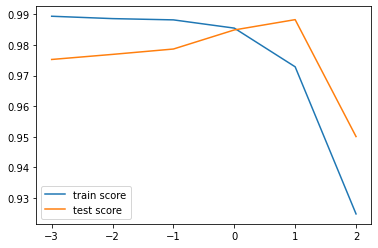

In [ ]:
plt.plot(np.log10(alpha_list), train_score, label='train score')
plt.plot(np.log10(alpha_list), test_score, label='test score')
plt.legend()
plt.show()

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9882291216631598
0.9786990424365717


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=1000000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
print(train_score, test_score)

[0.9901910959639488, 0.9898167371991801, 0.9885574089669535, 0.9870901236143268, 0.9786400660604722, 0.897269984315456] [0.9682855304887121, 0.9741560340405653, 0.9775676151926583, 0.9835836337785356, 0.9907035406073654, 0.898060186841353]


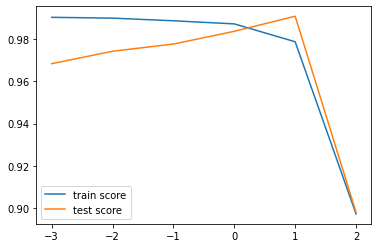

In [ ]:
plt.plot(np.log10(alpha_list), train_score, label='train score')
plt.plot(np.log10(alpha_list), test_score, label='test score')
plt.legend()
plt.show()

In [ ]:
lasso = Lasso(alpha=1, max_iter=1000000)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9870901236143268
0.9835836337785356


## 경사하강법

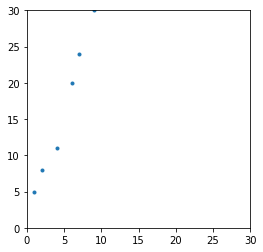

In [ ]:
ex = [2,4,7,1,9,6]
ex_ys = [8,11,24,5,30,20]
ex_xs = [[x] for x in ex] #독립변수 형태로 변환
plt.figure(figsize=(4,4))
plt.plot(ex, ex_ys, '.')
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

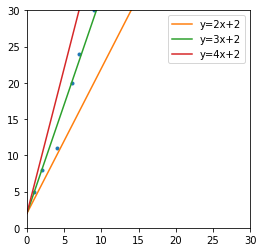

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(ex, ex_ys, '.')
plt.plot([0,30],[2*0+2, 2*30+2], label='y=2x+2')
plt.plot([0,30],[3*0+2, 3*30+2], label='y=3x+2')
plt.plot([0,30],[4*0+2, 4*30+2], label='y=4x+2')
plt.xlim(0,30)
plt.ylim(0,30)
plt.legend()
plt.show()

In [ ]:
def mae(yp, y):
    return np.mean(np.abs(yp-y))
def mse(yp, y):
    return np.mean(sum(yp-y)**2)

In [ ]:
yp = np.array([1,2,9])
ya = np.array([2,3,4])
print(mae(yp, ya), mse(yp, ya))

2.3333333333333335 9.0


In [ ]:
ex_arr = np.array(ex)
ey_arr = np.array(ex_ys)
mses=[]
yp1 = 2*ex_arr+2
mses.append(mse(yp1, ey_arr))
yp2 = 3*ex_arr+2
mses.append(mse(yp2, ey_arr))
yp3 = 4*ex_arr+2
mses.append(mse(yp3, ey_arr))
print(mses)

[784.0, 1.0, 900.0]


In [ ]:
ex_arr = np.array(ex)
ey_arr = np.array(ex_ys)
mses=[]
for w in np.arange(-2, 5, 0.1):
    yp = w*ex_arr+2
    mses.append(mse(yp, ey_arr))
print(mses)
print(np.argmin(mses))
print(mses[50])

[20736.0, 19909.21, 19099.239999999998, 18306.089999999997, 17529.760000000002, 16770.25, 16027.559999999998, 15301.689999999993, 14592.639999999996, 13900.409999999994, 13224.999999999993, 12566.409999999996, 11924.639999999994, 11299.68999999999, 10691.559999999996, 10100.249999999995, 9525.759999999991, 8968.089999999993, 8427.239999999993, 7903.209999999994, 7395.99999999999, 6905.609999999992, 6432.039999999992, 5975.289999999991, 5535.359999999992, 5112.249999999992, 4705.959999999992, 4316.489999999991, 3943.8399999999906, 3588.0099999999907, 3248.999999999991, 2926.8099999999918, 2621.4399999999914, 2332.889999999992, 2061.159999999992, 1806.2499999999927, 1568.1599999999928, 1346.8899999999928, 1142.4399999999935, 954.8099999999938, 783.9999999999942, 630.0099999999952, 492.8399999999951, 372.48999999999523, 268.9599999999962, 182.24999999999721, 112.35999999999754, 59.28999999999794, 23.039999999998813, 3.6099999999995696, 1.0000000000002611, 15.210000000001125, 46.2400000000

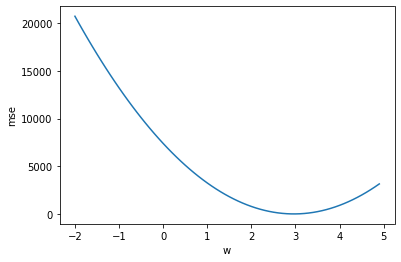

In [ ]:
plt.plot(np.arange(-2,5,0.1), mses)
plt.xlabel('w')
plt.ylabel('mse')
plt.show()

In [ ]:
def gradient(ys, xs, w, b):
    yp = w * xs + b
    error = ys - yp
    wd = -(2 / len(xs)) * sum(xs * error)
    bd = -(2/len(xs)) * sum(error)
    return wd, bd

In [ ]:
def gradient_descent(xs, ys, lr=0.001, epochs=1000):
    wphl = [] #학습 과정에서의 가중치와 편향을 보관
    wp = np.random.uniform(-1,1) #초기 가중치를 랜덤하게 설정
    bp = np.random.uniform(-1,1) #초기 편향을 랜덤하게 설정
    for epoch in range(epochs):
        wd, bd = gradient(ys, xs, wp, bp) #가중치와 편향의 기울기를 계산
        wp = wp - (wd * lr)
        bp = bp - (bd * lr)
        wphl.append([wp, bp])
    return wp, bp, wphl #가중치, 편향, 히스토리 반환

In [ ]:
wp, bp, wphl = gradient_descent(ex_arr, ey_arr)
for epoch, (wb, bd) in enumerate(wphl):
    print(f'epoch:{epoch:04d} w:{wb:10.2f} b:{bd:10.2f}')

epoch:0000 w:      0.93 b:     -0.88
epoch:0001 w:      1.09 b:     -0.86
epoch:0002 w:      1.24 b:     -0.83
epoch:0003 w:      1.38 b:     -0.81
epoch:0004 w:      1.50 b:     -0.79
epoch:0005 w:      1.63 b:     -0.77
epoch:0006 w:      1.74 b:     -0.75
epoch:0007 w:      1.85 b:     -0.73
epoch:0008 w:      1.95 b:     -0.72
epoch:0009 w:      2.04 b:     -0.70
epoch:0010 w:      2.13 b:     -0.69
epoch:0011 w:      2.21 b:     -0.67
epoch:0012 w:      2.29 b:     -0.66
epoch:0013 w:      2.36 b:     -0.65
epoch:0014 w:      2.42 b:     -0.64
epoch:0015 w:      2.49 b:     -0.63
epoch:0016 w:      2.55 b:     -0.62
epoch:0017 w:      2.60 b:     -0.61
epoch:0018 w:      2.65 b:     -0.60
epoch:0019 w:      2.70 b:     -0.59
epoch:0020 w:      2.74 b:     -0.58
epoch:0021 w:      2.79 b:     -0.58
epoch:0022 w:      2.83 b:     -0.57
epoch:0023 w:      2.86 b:     -0.56
epoch:0024 w:      2.90 b:     -0.56
epoch:0025 w:      2.93 b:     -0.55
epoch:0026 w:      2.96 b:     -0.54
e

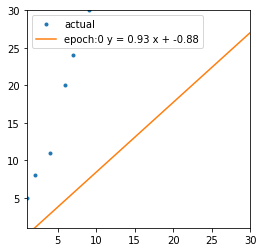

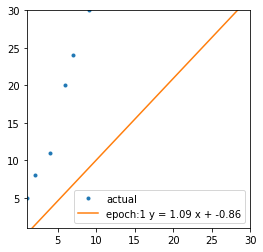

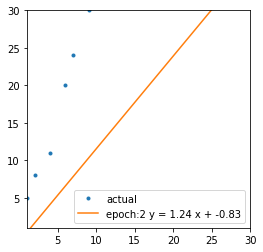

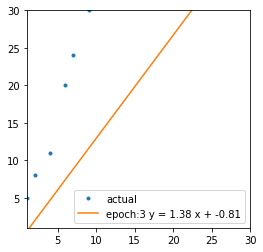

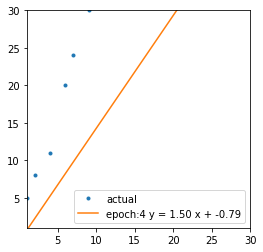

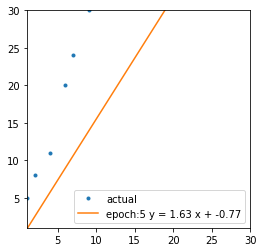

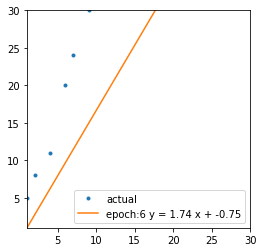

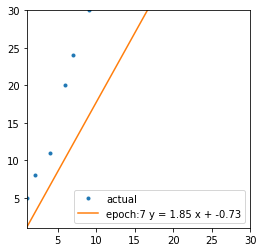

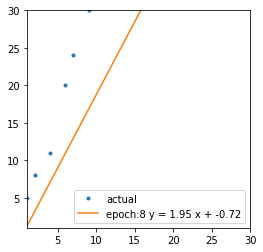

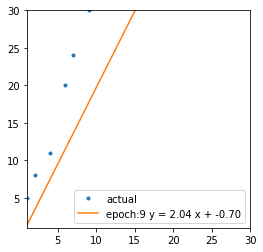

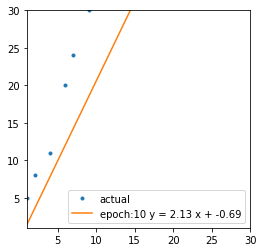

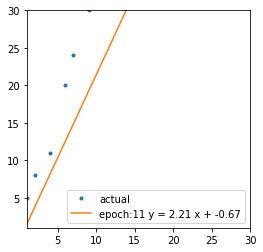

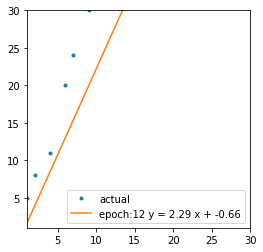

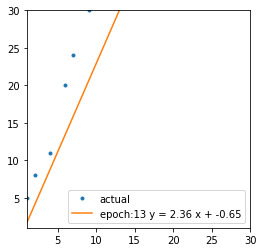

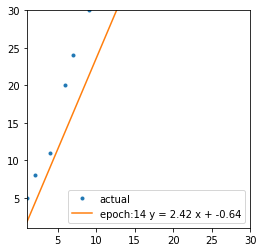

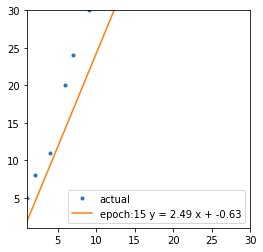

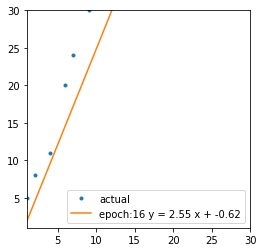

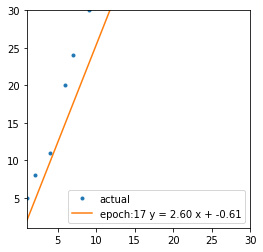

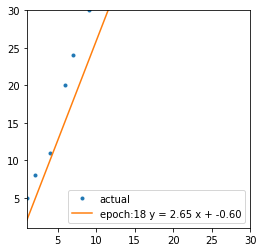

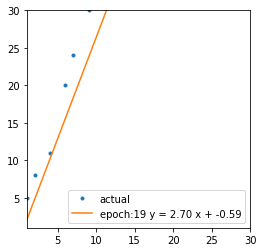

KeyboardInterrupt: ignored

In [ ]:
min_val = min(min(ex_arr), min(ey_arr))
max_val = max(max(ex_arr), max(ey_arr))
for epoch, (wb, bd) in enumerate(wphl):
    plt.figure(figsize=(4,4))
    sx = min_val
    sy = wb * sx + bd
    ex = max_val
    ey = wb * ex + bd
    plt.plot(ex_arr, ey_arr, '.', label='actual')
    plt.plot([sx, ex], [sy, ey], label=f'epoch:{epoch} y = {wb:.2f} x + {bd:.2f}')
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    plt.legend()
    plt.show()